## CSS Project Part 2
Arathy Pillai, Alexander Guth, Hammad Akthar, Hiba Saleel and Julian Jetz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation

In [2]:
plot_size = plt.rcParams["figure.figsize"]  
plot_size[0] = 15  
plot_size[1] = 8  
plt.rcParams["figure.figsize"] = plot_size  

### Load data and determine na values
repost and Text are determined as na values, because they ... **[TODO]**

In [3]:
na_values = ['nan', 'N/A', 'NaN', 'NaT', '0', '', 'Text', 'repost', 'r e p o s t -', 'Repost']
ira_data = pd.read_csv('../Data/data_IRA_Ads.csv', sep=";", parse_dates=['AD_CREATION_DATE', 'AD_END_DATE'], 
                       dayfirst=False, index_col='AD_ID', na_values=na_values)

### Click per View Ratio
#Clicks / #Impressions

In [4]:
ira_data.insert(5, 'AD_CLICKS_PER_VIEW', ira_data['AD_CLICKS']/ira_data['AD_IMPRESSIONS'])

### Convert ruble
Removes "RUB" from the cell AD_SPEND

In [5]:
ira_data['AD_SPEND']=ira_data['AD_SPEND'].str.replace(' RUB','')

### Cleaning up targeting data

In [6]:
def remove_punctuation_at_the_end(x):
    #remove "," and "." and ":" from the end of x
    x = x.rstrip(',')
    x = x.rstrip('.')
    x = x.rstrip(':')
    #replace ";" and ",." with "," in x
    x = x.replace(';', ',')
    x = x.replace(',.', ',')
    return x

In [7]:
#replace abbreviations with their long form in AD_TARGETING_EXCLUDED_CONNECTIONS
ira_data['AD_TARGETING_EXCLUDED_CONNECTIONS']=ira_data['AD_TARGETING_EXCLUDED_CONNECTIONS'].str.replace('Exclude people who like BM','Exclude people who like Black Matters')

#replace ")or" (missing space) with ") or" and ");" with ")," in AD_TARGETING_LANGUAGE due to having a different formats used
ira_data['AD_TARGETING_LANGUAGE'] = ira_data['AD_TARGETING_LANGUAGE'].str.replace('\)or', ') or')
ira_data['AD_TARGETING_LANGUAGE'] = ira_data['AD_TARGETING_LANGUAGE'].str.replace('\);', '),')

#??Remove lines without AD_TARGETING_INTERESTS and execute remove_punctuation_at_the_end on each string in AD_TARGETING_INTERESTS
ira_data['AD_TARGETING_INTERESTS'] = ira_data['AD_TARGETING_INTERESTS'].dropna().apply(lambda x: remove_punctuation_at_the_end(str(x)))
ira_data['AD_TARGETING_PEOPLE_WHO_MATCH'] = ira_data['AD_TARGETING_PEOPLE_WHO_MATCH'].dropna().apply(lambda x: remove_punctuation_at_the_end(str(x)))
ira_data['AD_TARGETING_EXCLUDE'] = ira_data['AD_TARGETING_EXCLUDE'].dropna().apply(lambda x: remove_punctuation_at_the_end(str(x)))

### Add column for amount of different targeted interests
**TODO** Control result of count function, include Behavior: (browser): 

In [8]:
def replace_target_seperator(x):
    x = x.replace(' or ', ',')
    x = x.replace(',,', ',')
    x = x.replace('AND MUST ALSO MATCH:', ',')
    x = x.replace(', Jr.', ' Jr.')
    x = x.replace('. ', ', ')
    return x

In [9]:
ira_data.insert(12, 'AD_TARGETING_EXCLUDE_COUNT', np.NaN)
ira_data.insert(17, 'AD_TARGETING_INTEREST_COUNT', np.NaN)
ira_data.insert(23, 'AD_TARGETING_PEOPLE_WHO_MATCH_COUNT', np.NaN)

In [10]:
ira_data['AD_TARGETING_EXCLUDE_COUNT'] = ira_data['AD_TARGETING_EXCLUDE'].dropna().apply(lambda x: len(replace_target_seperator(str(x)).split(',')))

In [11]:
ira_data['AD_TARGETING_INTEREST_COUNT'] = ira_data['AD_TARGETING_INTERESTS'].dropna().apply(lambda x: len(replace_target_seperator(str(x)).split(',')))

In [12]:
ira_data['AD_TARGETING_PEOPLE_WHO_MATCH_COUNT'] = ira_data['AD_TARGETING_PEOPLE_WHO_MATCH'].dropna().apply(lambda x: len(replace_target_seperator(str(x)).split(',')))

In [13]:
pd.set_option('display.max_colwidth', -1)
ira_data[['AD_TARGETING_EXCLUDE', 'AD_TARGETING_EXCLUDE_COUNT', 'AD_TARGETING_INTERESTS', 'AD_TARGETING_INTEREST_COUNT', 'AD_TARGETING_PEOPLE_WHO_MATCH', 'AD_TARGETING_PEOPLE_WHO_MATCH_COUNT']].sample(20)

,AD_TARGETING_EXCLUDE,AD_TARGETING_EXCLUDE_COUNT,AD_TARGETING_INTERESTS,AD_TARGETING_INTEREST_COUNT,AD_TARGETING_PEOPLE_WHO_MATCH,AD_TARGETING_PEOPLE_WHO_MATCH_COUNT
AD_ID,,,,,,
1658,NaN,NaN,Islam,1.0,NaN,NaN
2882,NaN,NaN,"Martin Luther King, Jr., Black history, African- American Civil Rights Movement(1954-68), African-American history, Malcolm X or Black (Color)",6.0,NaN,NaN
1437,NaN,NaN,"Antelope Valley College, School: University of California, Riverside, California State University, East Bay Continuing Education or University of Wisconsin-Madison",6.0,NaN,NaN
2625,NaN,NaN,"Mexico. Latin hip hop. Chicano Movement, Hispanidad, Lowrider, Chicano rap or La Raza",7.0,NaN,NaN
2892,NaN,NaN,Amenity or Jesus Daily,2.0,NaN,NaN
2577,NaN,NaN,"Mexico. Latin hip hop. Chicano Movement, Hispanidad, Lowrider, Chicano rap or La Raza",7.0,NaN,NaN
621,NaN,NaN,Homosexuality,1.0,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN
525,NaN,NaN,"Donald Trump, Donald Trump for President or Donald Trump Jr",3.0,NaN,NaN


### Drop all subsets, where AD_TEXT is na

In [14]:
ira_data=ira_data.dropna(subset=['AD_TEXT']);
ira_data['AD_TEXT'].count()

3436

### Remove hyperlinks

In [15]:
ira_data['AD_TEXT']=ira_data['AD_TEXT'].str.replace(r'https?:\/\/.*[\r\n]*', '')
ira_data['AD_TEXT']=ira_data['AD_TEXT'].str.replace(r'http?:\/\/.*[\r\n]*', '')

### Select all duplicate ad texts

In [16]:
duplicateDF = pd.concat(g for _, g in ira_data.groupby("AD_TEXT") if len(g) > 1).copy()
duplicateDF.sort_values(by=['AD_TEXT'], inplace=True)

### Total Duplicates

In [17]:
duplicateDF['AD_TEXT'].count()

1438

### Unique Duplicate Pairs

In [18]:
duplicateDF['AD_TEXT'].nunique()

361

### Occurence of Duplicate Pairs

In [43]:
duplicateDF[duplicateDF['AD_IMPRESSIONS']>0]['AD_TEXT'].value_counts()

We speak for all fellow members of LGBT community across the nation.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [53]:
duplicateDF[(duplicateDF['AD_IMPRESSIONS']>0) & duplicateDF['AD_TEXT'].str.match('We speak for all fellow members of LGBT community across the nation.')][['AD_CLICKS', 'AD_IMPRESSIONS', 'AD_CREATION_DATE','AD_TEXT', 'AD_TARGETING_AGE', 'AD_SPEND', 'AD_TARGETING_CUSTOM_AUDIENCE', 'AD_TARGETING_EXCLUDE', 'AD_TARGETING_EXCLUDED_CONNECTIONS', 'AD_TARGETING_INTERESTS', 'AD_TARGETING_LOCATION', 'AD_TARGETING_LOCATION_LIVING_IN', 'AD_TARGETING_FRIENDS_OF_CONNECTIONS', 'AD_TARGETING_PLACEMENTS', 'AD_TARGETING_LANGUAGE', 'AD_TARGETING_PEOPLE_WHO_MATCH', 'AD_POTENTIAL_TARGET']].head(20)

,AD_CLICKS,AD_IMPRESSIONS,AD_CREATION_DATE,AD_TEXT,AD_TARGETING_AGE,AD_SPEND,AD_TARGETING_CUSTOM_AUDIENCE,AD_TARGETING_EXCLUDE,AD_TARGETING_EXCLUDED_CONNECTIONS,AD_TARGETING_INTERESTS,AD_TARGETING_LOCATION,AD_TARGETING_LOCATION_LIVING_IN,AD_TARGETING_FRIENDS_OF_CONNECTIONS,AD_TARGETING_PLACEMENTS,AD_TARGETING_LANGUAGE,AD_TARGETING_PEOPLE_WHO_MATCH,AD_POTENTIAL_TARGET
AD_ID,,,,,,,,,,,,,,,,,
591,5441.0,93925.0,2016-03-23 05:36:11,We speak for all fellow members of LGBT community across the nation.,18 - 54,31713.12,NaN,NaN,NaN,"Gay pride, LGBT community, Homosexuality, LGBT culture or Same-sex marriage",United States,NaN,Friends of people who are connected to LGBT United,News Feed on mobile devices,English (UK) or English (US),NaN,NaN
592,7289.0,190076.0,2016-08-04 04:20:05,We speak for all fellow members of LGBT community across the nation.,18 - 54,36000.00,NaN,NaN,NaN,"Gay pride, Homosexuality, LGBT culture, LGBT community or Same-sex marriage",United States,NaN,Friends of people who are connected to LGBT United,News Feed on desktop computers or News Feed on mobile devices,English (UK) or English (US),NaN,NaN
590,6566.0,67221.0,2015-11-05 23:11:58,We speak for all fellow members of LGBT community across the nation.,18 - 54,46994.76,NaN,NaN,Exclude people who like LGBT United,"Gay pride, LGBT community, Homosexuality, LGBT culture or Same-sex marriage",United States,NaN,NaN,News Feed on mobile devices,English (UK) or English (US),NaN,36000000.0
669,91.0,1997.0,2015-06-17 03:15:18,We speak for all fellow members of LGBT community across the nation.,18 - 65+,2673.94,NaN,NaN,Exclude people who like LGBT United,"LGBT community, Homosexuality, Yoga, Fitness and wellness or Politics and social issues",United States,NaN,NaN,News Feed on desktop computers or News Feed on mobile devices,English (UK) or English (US),NaN,144000000.0
588,21449.0,175460.0,2015-07-14 00:01:38,We speak for all fellow members of LGBT community across the nation.,18 - 65+,93754.38,NaN,NaN,Exclude people who like LGBT United,"Gay pride, LGBT community, Homosexuality, LGBT culture or Same-sex marriage",United States,NaN,NaN,News Feed on desktop computers or News Feed on mobile devices,English (UK) or English (US),NaN,41000000.0
586,59.0,1811.0,2015-07-07 01:51:07,We speak for all fellow members of LGBT community across the nation.,18 - 65+,757.65,NaN,NaN,Exclude people who like LGBT United,"Motherhood, Philosophy, LGBT community, Indiana, Puppy, Homosexuality, Love, Society, Dogs, Fitness and wellness, Family or Photography",United States,NaN,NaN,News Feed on desktop computers or News Feed on mobile devices,English (UK) or English (US),NaN,166000000.0
585,1252.0,11857.0,2015-07-01 02:55:07,We speak for all fellow members of LGBT community across the nation.,18 - 65+,5538.24,NaN,NaN,Exclude people who like LGBT United,"Motherhood, Philosophy, LGBT community, Indiana, Homosexuality, Love, Society, Fitness and wellness, Family or Photography",United States,NaN,NaN,News Feed on desktop computers or News Feed on mobile devices,English (UK) or English (US),NaN,165000000.0
584,3206.0,31618.0,2015-06-23 05:06:57,We speak for all fellow members of LGBT community across the nation.,18 - 65+,16630.20,NaN,NaN,Exclude people who like LGBT United,"Motherhood, Philosophy, LGBT community, Indiana, Homosexuality, Love or Society",United States,NaN,NaN,News Feed on desktop computers or News Feed on mobile devices,English (UK) or English (US),NaN,143000000.0
583,186.0,4265.0,2015-06-22 08:19:07,We speak for all fellow members of LGBT community across the nation.,18 - 65+,1393.55,NaN,NaN,Exclude people who like LGBT United,"Motherhood, LGBT community, Indiana, Homosexuality or Love",United States,NaN,NaN,News Feed on desktop computers or News Feed on mobile devices,English (UK) or English (US),NaN,139000000.0


TypeError: unsupported operand type(s) for -: 'method' and 'int'

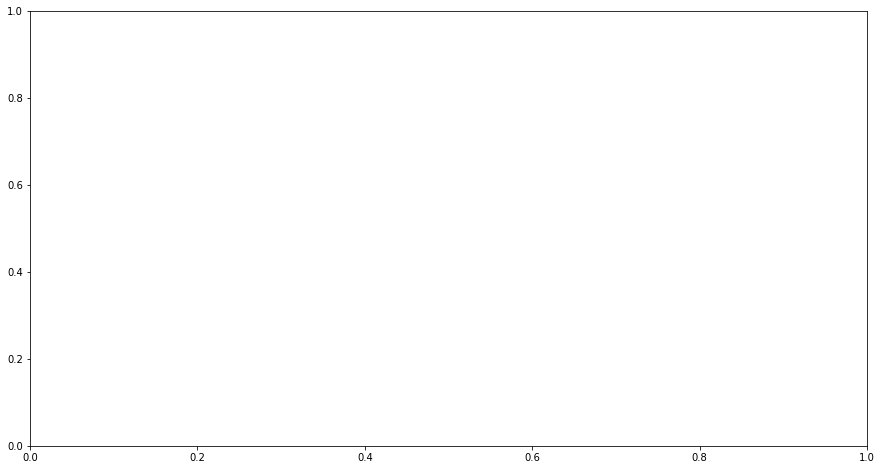

In [59]:
fig1, ax1 = plt.subplots()
ind = np.arange(duplicateDF[(duplicateDF['AD_IMPRESSIONS']>0) & duplicateDF['AD_TEXT'].str.match('We speak for all fellow members of LGBT community across the nation.')]['AD_TARGETING_INTEREST_COUNT'].count)    # the x locations for the groups
width = 0.35 
ax1.bar(duplicateDF[(duplicateDF['AD_IMPRESSIONS']>0) & duplicateDF['AD_TEXT'].str.match('We speak for all fellow members of LGBT community across the nation.')]['AD_TARGETING_INTEREST_COUNT'], width)
plt.show()

In [21]:
duplicateDF['AD_TARGETING_AGE'].unique()

array(['18 - 65+', '16 - 65+', '15 - 54', '15 - 25', '14 - 17', '15 - 30',
       '18 - 51', '18 - 54', '18 65+', '17 - 65+', '40 - 65+', '30 - 65+',
       '20 - 65+', '45 - 64', '24 - 45', '18 - 50', '25 - 65+',
       '13 - 65+', '35 - 65+', '21 - 65+', '18 - 45', '13 - 44',
       '14 - 40', '15 - 65+', '19 - 30', '20 - 45', '13 - 30', '13 - 45',
       '18 - 59', '18 - 48', '16 - 55', '14 - 54', '16 - 54', '16 - 45',
       '14 - 65+', '13 - 40', '45 - 65+', '18 - 53', '18 - 39', '18 - 61',
       '16 - 53', '13 - 60', '24 - 65+', '18 - 60', '15 - 26'],
      dtype=object)

In [22]:
duplicateDF['AD_TARGETING_CUSTOM_AUDIENCE'].value_counts()

Lookalike(US, 1%)- People who like Defend the 2nd               6
Lookalike(US, 1%)- newtestaudit                                 3
tesy                                                            2
Lookalike(US, 1%)- People who like United Muslims of America    2
Lookalike(US, 10%)- tesy                                        2
Lookalike(US, 10%)- newtestaudit                                1
Lookalike(US, 1%)- tr                                           1
Name: AD_TARGETING_CUSTOM_AUDIENCE, dtype: int64

In [23]:
duplicateDF['AD_TARGETING_EXCLUDE'].value_counts()

Behaviors: Hispanic(US - All), Hispanic(US - Spanish dominant), Hispanic(US - English dominant), Hispanic(US - Bilingual: English and Spanish) or Asian American (US)    36
Multicultural Affinity: Hispanic(US - All), Hispanic(US - Spanish dominant), Hispanic(US - English dominant), Hispanic(US - Bilingual) or Asian American (US)            8 
Multicultural Affinity: Hispanic (US - All), Hispanic (US - Spanish dominant), Hispanic (US - English dominant), Hispanic (US - Bilingual) or Asian American (US)        2 
Multicultural Affinity: Hispanic(US -All), Hispanic(US - Spanish dominant), Hispanic(US - English dominant), Hispanic(US - Bilingual) or Asian American (US)             2 
Behaviors Hispanic(US - All), Hispanic(US - Spanish dominant), Hispanic(US - English dominant), Hispanic(US - Bilingual: English and Spanish) or Asian American (US)     1 
Name: AD_TARGETING_EXCLUDE, dtype: int64

In [24]:
duplicateDF['AD_TARGETING_EXCLUDED_CONNECTIONS'].value_counts()

Exclude people who like Black Matters                                    92
Exclude people who like Stop A.1.                                        77
Exclude people who like Williams&Kalvin                                  71
Exclude people who like Defend the 2nd                                   65
Exclude people who like Stop Refugees                                    50
Exclude people who like Blacktivist                                      46
Exclude people who like Don't Shoot                                      40
Exclude people who like United Muslims of America                        36
Exclude people who like Heart of Texas                                   35
Exclude people who like Black4Black                                      23
Exclude people who like LGBT United                                      21
Exclude people who like Secured Borders                                  16
Exclude people who like Being Patriotic                                  15
Exclude peop

In [25]:
duplicateDF['AD_TARGETING_INTERESTS'].nunique()

336

In [26]:
duplicateDF['AD_TARGETING_LOCATION'].nunique()

55

In [27]:
duplicateDF['AD_TARGETING_LOCATION_LIVING_IN'].value_counts().values

array([335,  43,  19,  18,  11,   6,   6,   5,   5,   4,   4,   3,   3,
         3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [28]:
duplicateDF['AD_TARGETING_FRIENDS_OF_CONNECTIONS'].value_counts()

Friends of people who are connected to Black Matters      17
Friends of people who are connected to Don't Shoot        9 
Friends of people who are connected to LGBT United        5 
Friends of people who are connected to Williams&Kalvin    1 
Name: AD_TARGETING_FRIENDS_OF_CONNECTIONS, dtype: int64

In [29]:
duplicateDF['AD_TARGETING_PLACEMENTS'].value_counts().values

array([920, 254,  99,  66,  27,  12,  10,   9,   8,   7,   4,   4,   4,
         3,   2,   2,   1,   1,   1,   1,   1,   1,   1])

In [30]:
duplicateDF['AD_TARGETING_LANGUAGE'].value_counts()

English (UK) or English (US)                              868
English (US)                                              70 
English (UK), Arabic or English (US)                      33 
Spanish, English (UK), English (US) or Spanish (Spain)    4  
Name: AD_TARGETING_LANGUAGE, dtype: int64

In [31]:
duplicateDF['AD_TARGETING_PEOPLE_WHO_MATCH'].value_counts().values

array([61, 14, 13, 13,  9,  8,  6,  6,  6,  5,  5,  4,  3,  3,  3,  2,  2,
        2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1])